### From SE
https://stats.stackexchange.com/questions/295617/what-is-the-advantages-of-wasserstein-metric-compared-to-kullback-leibler-diverg

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
import pandas as pd

Wassstein Distance: left  = 2.0 | right = 0.5
KL(P||Q)      : left  = 0.89588 | right = 0.89588
KL(Q||P)      : left  = 0.89588 | right = 0.89588
J-S distance  : left  = 0.53463 | right = 0.53463


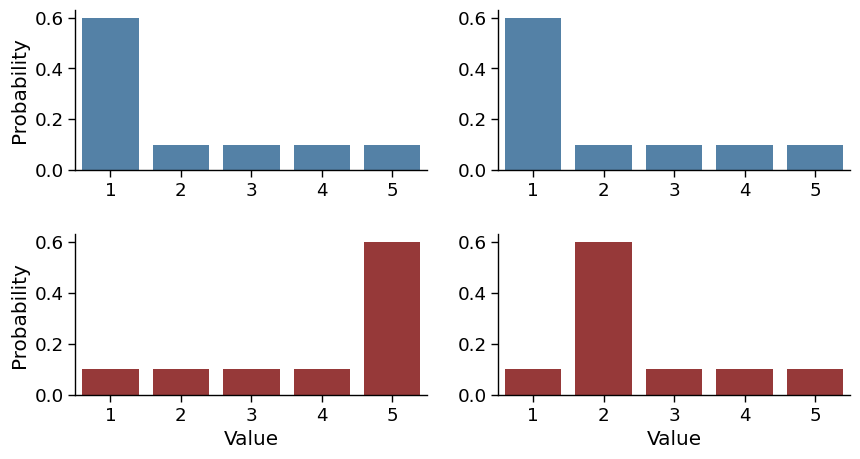

In [24]:
sns.set_context("paper", font_scale=1.5)

# Define samples for comparison
sampP = [1, 1, 1, 1, 1, 1, 2, 3, 4, 5]
sampQ = [1, 2, 3, 4, 5, 5, 5, 5, 5, 5]
sampQ2 = [1, 2, 2, 2, 2, 2, 2, 3, 4, 5]

# Compute distributions
P = np.unique(sampP, return_counts=True)[1] / len(sampP)
Q = np.unique(sampQ, return_counts=True)[1] / len(sampQ)
Q2 = np.unique(sampQ2, return_counts=True)[1] / len(sampQ2)

p_color = "steelblue"
q_color = "brown"

fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # Adjust figure size to make subplots shorter
fig.subplots_adjust(wspace=0.2, hspace=0.4)  # Add more space between subplots

# Subplot 1: sampP vs sampQ
sns.barplot(x=np.arange(1, len(P) + 1), y=P, ax=axes[0, 0], color=p_color)
axes[0, 0].set_ylabel('Probability')

sns.barplot(x=np.arange(1, len(Q) + 1), y=Q, ax=axes[1, 0], color=q_color)
axes[1, 0].set_ylabel('Probability')
axes[1, 0].set_xlabel('Value')

# Subplot 2: sampP vs sampQ2
sns.barplot(x=np.arange(1, len(P) + 1), y=P, ax=axes[0, 1], color=p_color)

sns.barplot(x=np.arange(1, len(Q2) + 1), y=Q2, ax=axes[1, 1], color=q_color)
axes[1, 1].set_xlabel('Value')
sns.despine()

# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl.pdf")

# calculate distance
wass_1 = scipy.stats.wasserstein_distance(sampP, sampQ)
wass_2 = scipy.stats.wasserstein_distance(sampP, sampQ2)
kl_qp = scipy.stats.entropy(Q, P)
kl_q2p = scipy.stats.entropy(Q2, P)
kl_pq = scipy.stats.entropy(P, Q)
kl_pq2 = scipy.stats.entropy(P, Q2)
js_distance_1 = scipy.spatial.distance.jensenshannon(P, Q, base=2)
js_distance_2 = scipy.spatial.distance.jensenshannon(P, Q2, base=2)
print(f"Wassstein Distance: left  = {wass_1} | right = {wass_2}")
print(f"KL(P||Q)      : left  = {kl_pq:.5f} | right = {kl_pq2:.5f}")
print(f"KL(Q||P)      : left  = {kl_qp:.5f} | right = {kl_q2p:.5f}")
print(f"J-S distance  : left  = {js_distance_1:.5f} | right = {js_distance_2:.5f}")

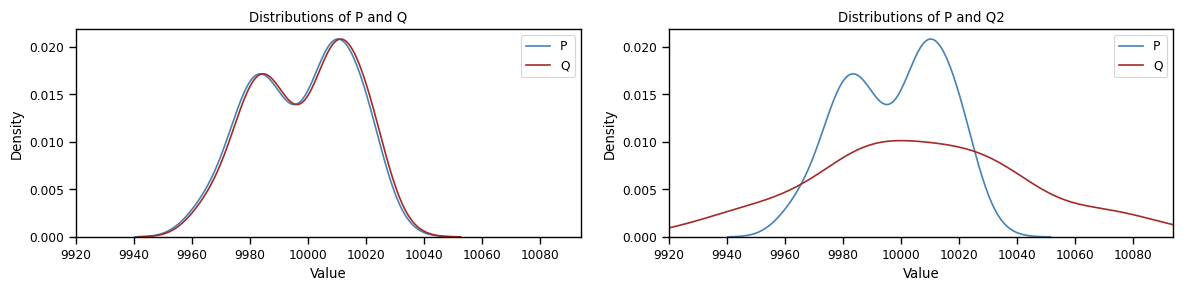

Wassstein     : left  = 1.000 | right = 16.100
KL(P||Q)      : left  = 5.099 | right = 6.874
KL(Q||P)      : left  = 5.284 | right = 9.152
J-S distance  : left  = 0.604 | right = 0.686


<Figure size 640x480 with 0 Axes>

In [25]:
sns.set_context("paper", font_scale=1)

# np.random.seed(42)  # For reproducibility
num_samples = 100
sampP = np.round(np.random.normal(loc=10000, scale=20, size=num_samples))
sampQ = sampP + 1
sampQ2 = np.round(np.random.normal(loc=10000, scale=40, size=num_samples))

# Define consistent bin edges
bins = np.arange(np.min([sampP, sampQ, sampQ2]) - 1, np.max([sampP, sampQ, sampQ2]) + 2)

# Compute distributions
P, _ = np.histogram(sampP, bins=bins, density=True)
Q, _ = np.histogram(sampQ, bins=bins, density=True)
Q2, _ = np.histogram(sampQ2, bins=bins, density=True)

epsilon = 1e-10  # Small constant to avoid division by zero
P += epsilon
Q += epsilon
Q2 += epsilon


p_color = "steelblue"
q_color = "brown"

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
x_min = min(sampP.min(), sampQ.min(), sampQ2.min())
x_max = max(sampP.max(), sampQ.max(), sampQ2.max())

# Plot P and Q
sns.kdeplot(sampP, label='P', ax=axes[0], color=p_color, fill=False)
sns.kdeplot(sampQ, label='Q', ax=axes[0], color=q_color, fill=False)
axes[0].set_title("Distributions of P and Q")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].legend()

# Plot P and Q2
sns.kdeplot(sampP, label='P', ax=axes[1], color=p_color, fill=False)
sns.kdeplot(sampQ2, label='Q', ax=axes[1], color=q_color, fill=False)
axes[1].set_title("Distributions of P and Q2")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].legend()

axes[0].set_xlim(x_min, x_max)
axes[1].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl.pdf")

# calculate distance
wass_1 = scipy.stats.wasserstein_distance(sampP, sampQ)
wass_2 = scipy.stats.wasserstein_distance(sampP, sampQ2)
kl_qp = scipy.stats.entropy(Q, P)
kl_q2p = scipy.stats.entropy(Q2, P)
kl_pq = scipy.stats.entropy(P, Q)
kl_pq2 = scipy.stats.entropy(P, Q2)
js_distance_1 = scipy.spatial.distance.jensenshannon(P, Q, base=2)
js_distance_2 = scipy.spatial.distance.jensenshannon(P, Q2, base=2)
print(f"Wassstein     : left  = {wass_1:.3f} | right = {wass_2:.3f}")
print(f"KL(P||Q)      : left  = {kl_pq:.3f} | right = {kl_pq2:.3f}")
print(f"KL(Q||P)      : left  = {kl_qp:.3f} | right = {kl_q2p:.3f}")
print(f"J-S distance  : left  = {js_distance_1:.3f} | right = {js_distance_2:.3f}")

using seed =  29


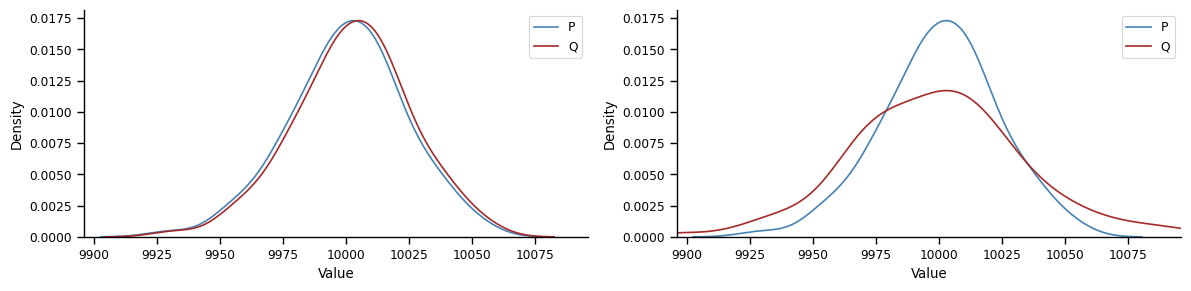

Wassstein     : left  = 2.000 | right = 8.470
KL(P||Q)      : left  = 7.372 | right = 7.296
KL(Q||P)      : left  = 7.176 | right = 8.270
J-S distance  : left  = 0.649 | right = 0.667


<Figure size 640x480 with 0 Axes>

In [42]:
sns.set_context("paper", font_scale=1)

seed = 29 # np.random.randint(100)
print('using seed = ', seed)
np.random.seed(seed)  # For reproducibility
num_samples = 100
sampP = np.round(np.random.normal(loc=10000, scale=20, size=num_samples))
sampQ = sampP + 2
sampQ2 = np.round(np.random.normal(loc=10000, scale=40, size=num_samples))

# Define consistent bin edges
bins = np.arange(np.min([sampP, sampQ, sampQ2]) - 1, np.max([sampP, sampQ, sampQ2]) + 2)

# Compute distributions
P, _ = np.histogram(sampP, bins=bins, density=True)
Q, _ = np.histogram(sampQ, bins=bins, density=True)
Q2, _ = np.histogram(sampQ2, bins=bins, density=True)

epsilon = 1e-10  # Small constant to avoid division by zero
P += epsilon
Q += epsilon
Q2 += epsilon


p_color = "steelblue"
q_color = "brown"

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
x_min = min(sampP.min(), sampQ.min(), sampQ2.min())
x_max = max(sampP.max(), sampQ.max(), sampQ2.max())

# Plot P and Q
sns.kdeplot(sampP, label='P', ax=axes[0], color=p_color, fill=False)
sns.kdeplot(sampQ, label='Q', ax=axes[0], color=q_color, fill=False)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].legend()

# Plot P and Q2
sns.kdeplot(sampP, label='P', ax=axes[1], color=p_color, fill=False)
sns.kdeplot(sampQ2, label='Q', ax=axes[1], color=q_color, fill=False)
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].legend()

axes[0].set_xlim(x_min, x_max)
axes[1].set_xlim(x_min, x_max)

sns.despine()
plt.tight_layout()
plt.show()

# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl.pdf")

# calculate distance
wass_1 = scipy.stats.wasserstein_distance(sampP, sampQ)
wass_2 = scipy.stats.wasserstein_distance(sampP, sampQ2)
kl_qp = scipy.stats.entropy(Q, P)
kl_q2p = scipy.stats.entropy(Q2, P)
kl_pq = scipy.stats.entropy(P, Q)
kl_pq2 = scipy.stats.entropy(P, Q2)
js_distance_1 = scipy.spatial.distance.jensenshannon(P, Q, base=2)
js_distance_2 = scipy.spatial.distance.jensenshannon(P, Q2, base=2)
print(f"Wassstein     : left  = {wass_1:.3f} | right = {wass_2:.3f}")
print(f"KL(P||Q)      : left  = {kl_pq:.3f} | right = {kl_pq2:.3f}")
print(f"KL(Q||P)      : left  = {kl_qp:.3f} | right = {kl_q2p:.3f}")
print(f"J-S distance  : left  = {js_distance_1:.3f} | right = {js_distance_2:.3f}")

using seed =  29
Wassstein     : left  = 2.000 | right = 14.950
KL(P||Q)      : left  = 7.372 | right = 7.324
KL(Q||P)      : left  = 7.176 | right = 9.355
J-S distance  : left  = 0.649 | right = 0.687


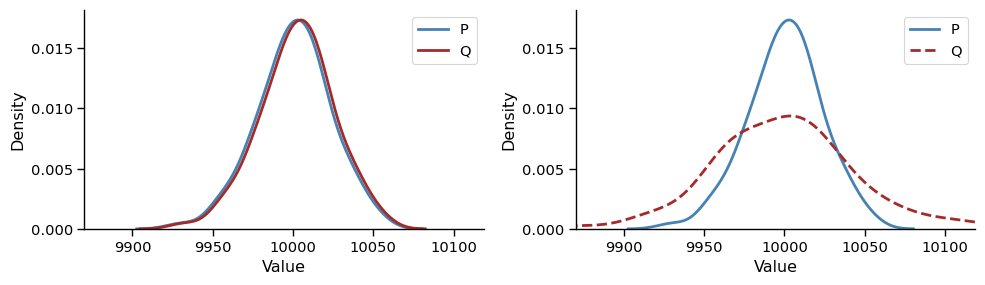

In [109]:
sns.set_context("paper", font_scale=1.2)

seed = 29 # np.random.randint(100)
print('using seed = ', seed)
np.random.seed(seed)  # For reproducibility
num_samples = 100
sampP = np.round(np.random.normal(loc=10000, scale=20, size=num_samples))
sampQ = sampP + 2
sampQ2 = np.round(np.random.normal(loc=10000, scale=50, size=num_samples))

# Define consistent bin edges
bins = np.arange(np.min([sampP, sampQ, sampQ2]) - 1, np.max([sampP, sampQ, sampQ2]) + 2)

# Compute distributions
P, _ = np.histogram(sampP, bins=bins, density=True)
Q, _ = np.histogram(sampQ, bins=bins, density=True)
Q2, _ = np.histogram(sampQ2, bins=bins, density=True)

epsilon = 1e-10  # Small constant to avoid division by zero
P += epsilon
Q += epsilon
Q2 += epsilon


p_color = "steelblue"
q_color = "brown"
lw = 2

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
x_min = min(sampP.min(), sampQ.min(), sampQ2.min())
x_max = max(sampP.max(), sampQ.max(), sampQ2.max())

# Plot P and Q
sns.kdeplot(sampP, label='P', ax=axes[0], color=p_color, fill=False, linewidth=lw)
sns.kdeplot(sampQ, label='Q', ax=axes[0], color=q_color, fill=False, linewidth=lw)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].legend()

# Plot P and Q2
sns.kdeplot(sampP, label='P', ax=axes[1], color=p_color, fill=False, linewidth=lw)
sns.kdeplot(sampQ2, label='Q', ax=axes[1], color=q_color, fill=False, linewidth=lw, linestyle='--')
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].legend()

axes[0].set_xlim(x_min, x_max)
axes[1].set_xlim(x_min, x_max)

sns.despine()
plt.tight_layout()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_sigma.svg")

# calculate distance
wass_1 = scipy.stats.wasserstein_distance(sampP, sampQ)
wass_2 = scipy.stats.wasserstein_distance(sampP, sampQ2)
kl_qp = scipy.stats.entropy(Q, P)
kl_q2p = scipy.stats.entropy(Q2, P)
kl_pq = scipy.stats.entropy(P, Q)
kl_pq2 = scipy.stats.entropy(P, Q2)
js_distance_1 = scipy.spatial.distance.jensenshannon(P, Q, base=2)
js_distance_2 = scipy.spatial.distance.jensenshannon(P, Q2, base=2)
print(f"Wassstein     : left  = {wass_1:.3f} | right = {wass_2:.3f}")
print(f"KL(P||Q)      : left  = {kl_pq:.3f} | right = {kl_pq2:.3f}")
print(f"KL(Q||P)      : left  = {kl_qp:.3f} | right = {kl_q2p:.3f}")
print(f"J-S distance  : left  = {js_distance_1:.3f} | right = {js_distance_2:.3f}")

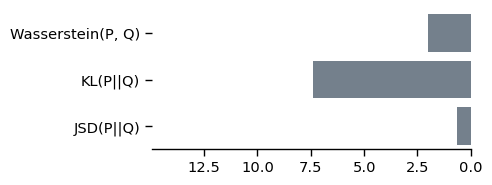

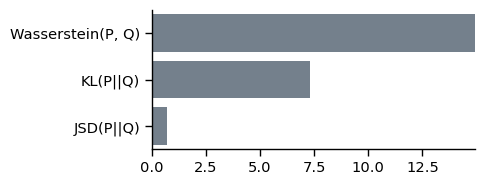

In [104]:
# Plot bar chart for distance metrics
sns.set_context("paper", font_scale=1.2)
max_value = max(wass_1, wass_2, kl_pq, kl_pq2, js_distance_1, js_distance_2)
bar_color = 'slategray'

plt.figure(figsize=(5, 2))  # Set plot size
metrics = ['Wasserstein(P, Q)', 'KL(P||Q)', 'JSD(P||Q)']
values = [wass_1, kl_pq, js_distance_1]
sns.barplot(y=metrics, x=values, color=bar_color)
plt.xlim(0, max_value)
sns.despine(left=True)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 2))  # Set plot sizevalues = [wass_2, kl_pq2, js_distance_2]
values = [wass_2, kl_pq2, js_distance_2]
sns.barplot(y=metrics, x=values,  color=bar_color)
plt.xlim(0, max_value)
sns.despine()
plt.tight_layout()
plt.show()

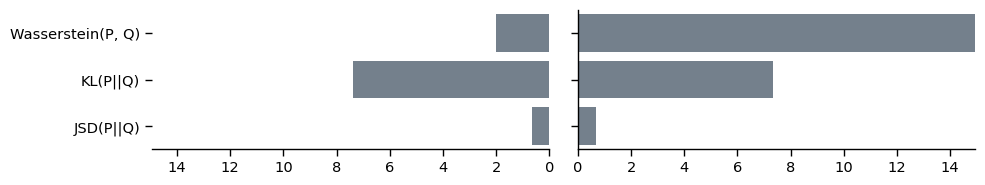

In [110]:
# Set up the style and context
sns.set_context("paper", font_scale=1.2)
bar_color = 'slategray'

# Example values
# wass_1, wass_2 = 0.8, 0.7
# kl_pq, kl_pq2 = 1.2, 1.1
# js_distance_1, js_distance_2 = 0.4, 0.5

max_value = max(wass_1, wass_2, kl_pq, kl_pq2, js_distance_1, js_distance_2)
metrics = ['Wasserstein(P, Q)', 'KL(P||Q)', 'JSD(P||Q)']

values_1 = [wass_1, kl_pq, js_distance_1]
values_2 = [wass_2, kl_pq2, js_distance_2]

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 2), sharey=True)

# Plot the first set of values
sns.barplot(ax=axes[0], y=metrics, x=values_1, color=bar_color)
axes[0].set_xlim(0, max_value)
axes[0].invert_xaxis()
sns.despine(ax=axes[0], left=True)
# axes[0].set_title("First Set of Metrics")

# Plot the second set of values
sns.barplot(ax=axes[1], y=metrics, x=values_2, color=bar_color)
axes[1].set_xlim(0, max_value)
sns.despine(ax=axes[1], left=False)
# axes[1].set_title("Second Set of Metrics")

# Adjust layout
plt.tight_layout()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_bar_symmetric.svg")

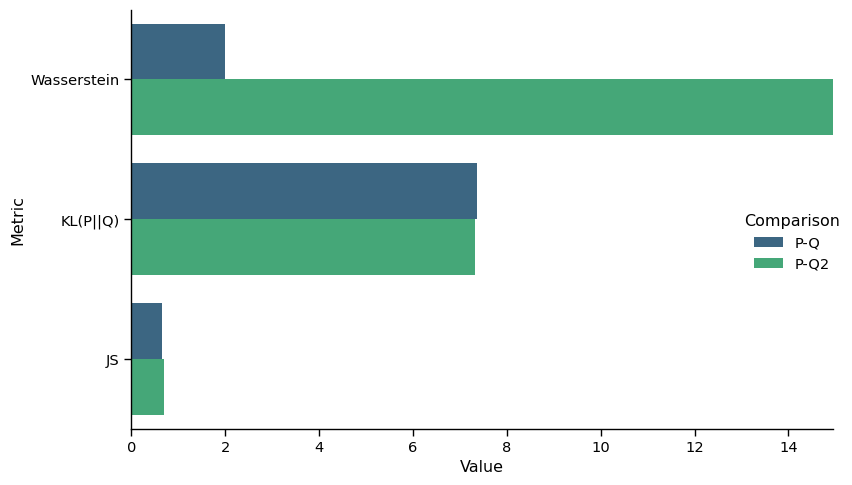

In [83]:
# Plot bar chart for distance metrics
sns.set_context("paper", font_scale=1.2)
# Determine shared x-axis range
max_value = max(wass_1, wass_2, kl_pq, kl_pq2, js_distance_1, js_distance_2)

# Prepare data for catplot
import pandas as pd
metrics = ['Wasserstein', 'KL(P||Q)', 'JS']
values_pq = [wass_1, kl_pq, js_distance_1]
values_pq2 = [wass_2, kl_pq2, js_distance_2]
data = pd.DataFrame({
    'Metric': metrics * 2,
    'Value': values_pq + values_pq2,
    'Comparison': ['P-Q'] * 3 + ['P-Q2'] * 3
})

# Plot catplot
sns.set_context("paper", font_scale=1.2)
g = sns.catplot(
    data=data, kind="bar",
    x="Value", y="Metric", hue="Comparison",
    height=5, aspect=1.5, palette="viridis"
)
g.set(xlim=(0, max_value))
g.despine()
plt.tight_layout()
plt.show()


using seed =  29
Wassstein     : left  = 2.000 | right = 14.950
KL(P||Q)      : left  = 7.372 | right = 7.324
KL(Q||P)      : left  = 7.176 | right = 9.355
J-S distance  : left  = 0.649 | right = 0.687


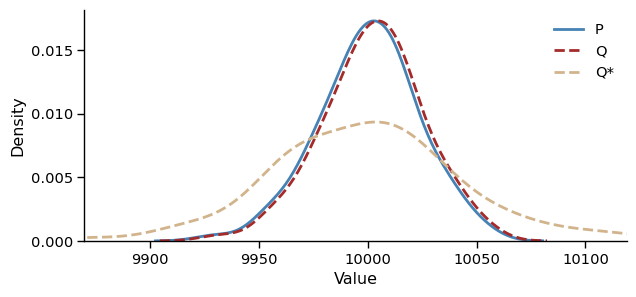

<Figure size 600x200 with 0 Axes>

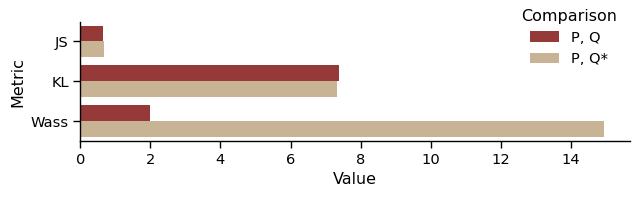

In [182]:
sns.set_context("paper", font_scale=1.2)

seed = 29 # np.random.randint(100)
print('using seed = ', seed)
np.random.seed(seed)  # For reproducibility
num_samples = 100
sampP = np.round(np.random.normal(loc=10000, scale=20, size=num_samples))
sampQ = sampP + 2
sampQ2 = np.round(np.random.normal(loc=10000, scale=50, size=num_samples))

# Define consistent bin edges
bins = np.arange(np.min([sampP, sampQ, sampQ2]) - 1, np.max([sampP, sampQ, sampQ2]) + 2)

# Compute distributions
P, _ = np.histogram(sampP, bins=bins, density=True)
Q, _ = np.histogram(sampQ, bins=bins, density=True)
Q2, _ = np.histogram(sampQ2, bins=bins, density=True)

epsilon = 1e-10  # Small constant to avoid division by zero
P += epsilon
Q += epsilon
Q2 += epsilon

# calculate distance
wass_1 = scipy.stats.wasserstein_distance(sampP, sampQ)
wass_2 = scipy.stats.wasserstein_distance(sampP, sampQ2)
kl_qp = scipy.stats.entropy(Q, P)
kl_q2p = scipy.stats.entropy(Q2, P)
kl_pq = scipy.stats.entropy(P, Q)
kl_pq2 = scipy.stats.entropy(P, Q2)
js_distance_1 = scipy.spatial.distance.jensenshannon(P, Q, base=2)
js_distance_2 = scipy.spatial.distance.jensenshannon(P, Q2, base=2)
max_value = max(wass_1, wass_2, kl_pq, kl_pq2, js_distance_1, js_distance_2)


# plotting
p_color = "steelblue"
q_color = "brown"
qs_color = 'tan'
lw = 2

# Plot distributions
plt.figure(figsize=(7, 3))
# Plot P and Q2
sns.kdeplot(sampP, label='P', color=p_color, fill=False, linewidth=lw)
sns.kdeplot(sampQ, label='Q', color=q_color, fill=False, linewidth=lw, linestyle='--')
sns.kdeplot(sampQ2, label='Q*', color=qs_color, fill=False, linewidth=lw, linestyle='--')
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(frameon=False)
plt.xlim(x_min, x_max)
# plt.tight_layout()
sns.despine()
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_combined.pdf")

plt.figure(figsize=(6, 2))
metrics = ['JS', 'KL', 'Wass']
values_pq = [js_distance_1, kl_pq, wass_1]
values_pq2 = [js_distance_2, kl_pq2, wass_2]
data = pd.DataFrame({
    'Metric': metrics * 2,
    'Value': values_pq + values_pq2,
    'Comparison': ['P, Q'] * 3 + ['P, Q*'] * 3
})

# Colors for the hue levels
q_color = "brown"
qs_color = "tan"
custom_palette = {
    'P, Q': q_color,
    'P, Q*': qs_color
}

# Plot catplot
sns.set_context("paper", font_scale=1.2)
g = sns.catplot(
    data=data, kind="bar",
    x="Value", y="Metric", hue="Comparison",
    palette=custom_palette,
    height=2, aspect=4.5)
g.fig.set_size_inches(7, 2)  # Width=10, Height=6
g._legend.set_bbox_to_anchor((0.9, 0.8))  # Adjust position as needed (x, y)
g.set_yticklabels(rotation=0) 
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_metric_combined.pdf")
print(f"Wassstein     : left  = {wass_1:.3f} | right = {wass_2:.3f}")
print(f"KL(P||Q)      : left  = {kl_pq:.3f} | right = {kl_pq2:.3f}")
print(f"KL(Q||P)      : left  = {kl_qp:.3f} | right = {kl_q2p:.3f}")
print(f"J-S distance  : left  = {js_distance_1:.3f} | right = {js_distance_2:.3f}")


using seed =  29
Wassstein     : left  = 2.000 | right = 31.680
KL(P||Q)      : left  = 11.289 | right = 11.551
KL(Q||P)      : left  = 11.296 | right = 10.388
J-S distance  : left  = 0.789 | right = 0.771


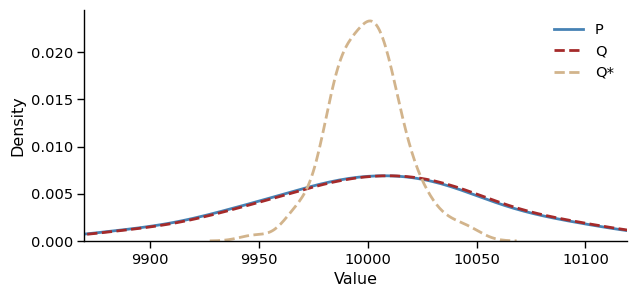

<Figure size 600x200 with 0 Axes>

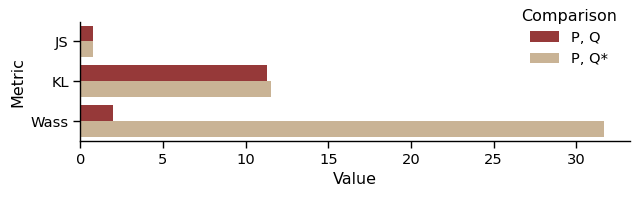

In [184]:
sns.set_context("paper", font_scale=1.2)

seed = 29 # np.random.randint(100)
print('using seed = ', seed)
np.random.seed(seed)  # For reproducibility
num_samples = 100
sampP = np.round(np.random.normal(loc=10000, scale=50, size=num_samples))
sampQ = sampP + 2
sampQ2 = np.round(np.random.normal(loc=10000, scale=20, size=num_samples))

# Define consistent bin edges
bins = np.arange(np.min([sampP, sampQ, sampQ2]) - 1, np.max([sampP, sampQ, sampQ2]) + 2)

# Compute distributions
P, _ = np.histogram(sampP, bins=bins, density=True)
Q, _ = np.histogram(sampQ, bins=bins, density=True)
Q2, _ = np.histogram(sampQ2, bins=bins, density=True)

epsilon = 1e-10  # Small constant to avoid division by zero
P += epsilon
Q += epsilon
Q2 += epsilon

# calculate distance
wass_1 = scipy.stats.wasserstein_distance(sampP, sampQ)
wass_2 = scipy.stats.wasserstein_distance(sampP, sampQ2)
kl_qp = scipy.stats.entropy(Q, P)
kl_q2p = scipy.stats.entropy(Q2, P)
kl_pq = scipy.stats.entropy(P, Q)
kl_pq2 = scipy.stats.entropy(P, Q2)
js_distance_1 = scipy.spatial.distance.jensenshannon(P, Q, base=2)
js_distance_2 = scipy.spatial.distance.jensenshannon(P, Q2, base=2)
max_value = max(wass_1, wass_2, kl_pq, kl_pq2, js_distance_1, js_distance_2)


# plotting
p_color = "steelblue"
q_color = "brown"
qs_color = 'tan'
lw = 2

# Plot distributions
plt.figure(figsize=(7, 3))
# Plot P and Q2
sns.kdeplot(sampP, label='P', color=p_color, fill=False, linewidth=lw)
sns.kdeplot(sampQ, label='Q', color=q_color, fill=False, linewidth=lw, linestyle='--')
sns.kdeplot(sampQ2, label='Q*', color=qs_color, fill=False, linewidth=lw, linestyle='--')
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(frameon=False)
plt.xlim(x_min, x_max)
# plt.tight_layout()
sns.despine()
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_combined.pdf")

plt.figure(figsize=(6, 2))
metrics = ['JS', 'KL', 'Wass']
values_pq = [js_distance_1, kl_pq, wass_1]
values_pq2 = [js_distance_2, kl_pq2, wass_2]
data = pd.DataFrame({
    'Metric': metrics * 2,
    'Value': values_pq + values_pq2,
    'Comparison': ['P, Q'] * 3 + ['P, Q*'] * 3
})

# Colors for the hue levels
q_color = "brown"
qs_color = "tan"
custom_palette = {
    'P, Q': q_color,
    'P, Q*': qs_color
}

# Plot catplot
sns.set_context("paper", font_scale=1.2)
g = sns.catplot(
    data=data, kind="bar",
    x="Value", y="Metric", hue="Comparison",
    palette=custom_palette,
    height=2, aspect=4.5)
g.fig.set_size_inches(7, 2)  # Width=10, Height=6
g._legend.set_bbox_to_anchor((0.9, 0.8))  # Adjust position as needed (x, y)
g.set_yticklabels(rotation=0) 
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_metric_combined.pdf")
print(f"Wassstein     : left  = {wass_1:.3f} | right = {wass_2:.3f}")
print(f"KL(P||Q)      : left  = {kl_pq:.3f} | right = {kl_pq2:.3f}")
print(f"KL(Q||P)      : left  = {kl_qp:.3f} | right = {kl_q2p:.3f}")
print(f"J-S distance  : left  = {js_distance_1:.3f} | right = {js_distance_2:.3f}")


using seed =  96
Wassstein     : left  = 2.000 | right = 18.190
KL(P||Q)      : left  = 9.704 | right = 9.834
KL(Q||P)      : left  = 9.861 | right = 8.625
J-S distance  : left  = 0.732 | right = 0.722


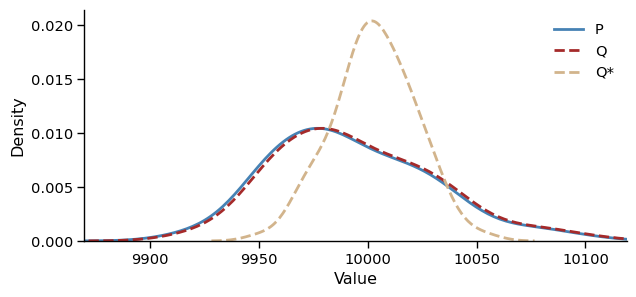

<Figure size 600x200 with 0 Axes>

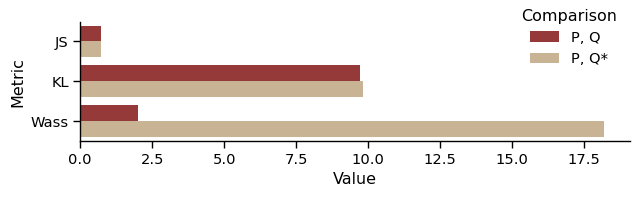

In [188]:
sns.set_context("paper", font_scale=1.2)

seed = np.random.randint(100)
print('using seed = ', seed)
np.random.seed(seed)  # For reproducibility
num_samples = 100
sampP = np.round(np.random.normal(loc=10000, scale=40, size=num_samples))
sampQ = sampP + 2
sampQ2 = np.round(np.random.normal(loc=10000, scale=20, size=num_samples))

# Define consistent bin edges
bins = np.arange(np.min([sampP, sampQ, sampQ2]) - 1, np.max([sampP, sampQ, sampQ2]) + 2)

# Compute distributions
P, _ = np.histogram(sampP, bins=bins, density=True)
Q, _ = np.histogram(sampQ, bins=bins, density=True)
Q2, _ = np.histogram(sampQ2, bins=bins, density=True)

epsilon = 1e-10  # Small constant to avoid division by zero
P += epsilon
Q += epsilon
Q2 += epsilon

# calculate distance
wass_1 = scipy.stats.wasserstein_distance(sampP, sampQ)
wass_2 = scipy.stats.wasserstein_distance(sampP, sampQ2)
kl_qp = scipy.stats.entropy(Q, P)
kl_q2p = scipy.stats.entropy(Q2, P)
kl_pq = scipy.stats.entropy(P, Q)
kl_pq2 = scipy.stats.entropy(P, Q2)
js_distance_1 = scipy.spatial.distance.jensenshannon(P, Q, base=2)
js_distance_2 = scipy.spatial.distance.jensenshannon(P, Q2, base=2)
max_value = max(wass_1, wass_2, kl_pq, kl_pq2, js_distance_1, js_distance_2)


# plotting
p_color = "steelblue"
q_color = "brown"
qs_color = 'tan'
lw = 2

# Plot distributions
plt.figure(figsize=(7, 3))
# Plot P and Q2
sns.kdeplot(sampP, label='P', color=p_color, fill=False, linewidth=lw)
sns.kdeplot(sampQ, label='Q', color=q_color, fill=False, linewidth=lw, linestyle='--')
sns.kdeplot(sampQ2, label='Q*', color=qs_color, fill=False, linewidth=lw, linestyle='--')
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(frameon=False)
plt.xlim(x_min, x_max)
# plt.tight_layout()
sns.despine()
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_combined.pdf")

plt.figure(figsize=(6, 2))
metrics = ['JS', 'KL', 'Wass']
values_pq = [js_distance_1, kl_pq, wass_1]
values_pq2 = [js_distance_2, kl_pq2, wass_2]
data = pd.DataFrame({
    'Metric': metrics * 2,
    'Value': values_pq + values_pq2,
    'Comparison': ['P, Q'] * 3 + ['P, Q*'] * 3
})

# Colors for the hue levels
q_color = "brown"
qs_color = "tan"
custom_palette = {
    'P, Q': q_color,
    'P, Q*': qs_color
}

# Plot catplot
sns.set_context("paper", font_scale=1.2)
g = sns.catplot(
    data=data, kind="bar",
    x="Value", y="Metric", hue="Comparison",
    palette=custom_palette,
    height=2, aspect=4.5)
g.fig.set_size_inches(7, 2)  # Width=10, Height=6
g._legend.set_bbox_to_anchor((0.9, 0.8))  # Adjust position as needed (x, y)
g.set_yticklabels(rotation=0) 
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_metric_combined.pdf")
print(f"Wassstein     : left  = {wass_1:.3f} | right = {wass_2:.3f}")
print(f"KL(P||Q)      : left  = {kl_pq:.3f} | right = {kl_pq2:.3f}")
print(f"KL(Q||P)      : left  = {kl_qp:.3f} | right = {kl_q2p:.3f}")
print(f"J-S distance  : left  = {js_distance_1:.3f} | right = {js_distance_2:.3f}")


using seed =  88
Wassstein     : left  = 2.000 | right = 11.310
KL(P||Q)      : left  = 7.581 | right = 7.587
KL(Q||P)      : left  = 7.044 | right = 6.150
J-S distance  : left  = 0.647 | right = 0.645


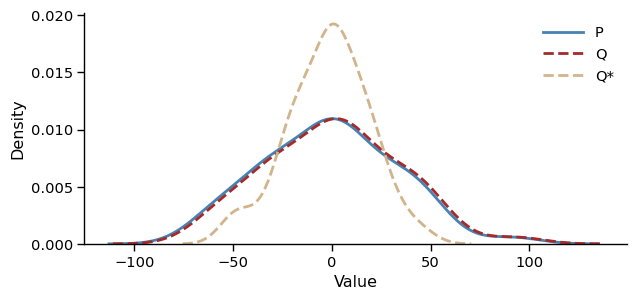

<Figure size 600x200 with 0 Axes>

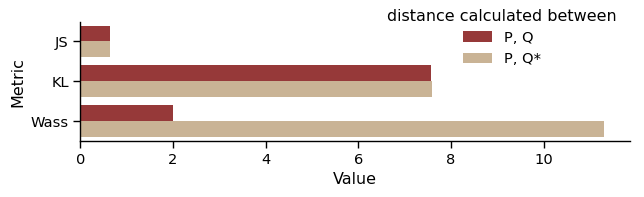

In [206]:
sns.set_context("paper", font_scale=1.2)

seed = 88 # np.random.randint(100)
print('using seed = ', seed) # 68 # 88
np.random.seed(seed)  # For reproducibility
num_samples = 100
sampP = np.round(np.random.normal(loc=0, scale=40, size=num_samples))
sampQ = sampP + 2
sampQ2 = np.round(np.random.normal(loc=0, scale=20, size=num_samples))

# Define consistent bin edges
bins = np.arange(np.min([sampP, sampQ, sampQ2]) - 1, np.max([sampP, sampQ, sampQ2]) + 2)

# Compute distributions
P, _ = np.histogram(sampP, bins=bins, density=True)
Q, _ = np.histogram(sampQ, bins=bins, density=True)
Q2, _ = np.histogram(sampQ2, bins=bins, density=True)

epsilon = 1e-10  # Small constant to avoid division by zero
P += epsilon
Q += epsilon
Q2 += epsilon

# calculate distance
wass_1 = scipy.stats.wasserstein_distance(sampP, sampQ)
wass_2 = scipy.stats.wasserstein_distance(sampP, sampQ2)
kl_qp = scipy.stats.entropy(Q, P)
kl_q2p = scipy.stats.entropy(Q2, P)
kl_pq = scipy.stats.entropy(P, Q)
kl_pq2 = scipy.stats.entropy(P, Q2)
js_distance_1 = scipy.spatial.distance.jensenshannon(P, Q, base=2)
js_distance_2 = scipy.spatial.distance.jensenshannon(P, Q2, base=2)
max_value = max(wass_1, wass_2, kl_pq, kl_pq2, js_distance_1, js_distance_2)


# plotting
p_color = "steelblue"
q_color = "brown"
qs_color = 'tan'
lw = 2

# Plot distributions
plt.figure(figsize=(7, 3))
# Plot P and Q2
sns.kdeplot(sampP, label='P', color=p_color, fill=False, linewidth=lw)
sns.kdeplot(sampQ, label='Q', color=q_color, fill=False, linewidth=lw, linestyle='--')
sns.kdeplot(sampQ2, label='Q*', color=qs_color, fill=False, linewidth=lw, linestyle='--')
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(
    frameon=False,
    handlelength=2.7,  # Increase line length in legend
    handletextpad=0.8  # Adjust spacing between line and text
)
sns.despine()
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_combined.pdf")

plt.figure(figsize=(6, 2))
metrics = ['JS', 'KL', 'Wass']
values_pq = [js_distance_1, kl_pq, wass_1]
values_pq2 = [js_distance_2, kl_pq2, wass_2]
data = pd.DataFrame({
    'Metric': metrics * 2,
    'Value': values_pq + values_pq2,
    'Comparison': ['P, Q'] * 3 + ['P, Q*'] * 3
})

# Colors for the hue levels
q_color = "brown"
qs_color = "tan"
custom_palette = {
    'P, Q': q_color,
    'P, Q*': qs_color
}

# Plot catplot
sns.set_context("paper", font_scale=1.2)
g = sns.catplot(
    data=data, kind="bar",
    x="Value", y="Metric", hue="Comparison",
    palette=custom_palette,
    height=2, aspect=4.5)
g._legend.set_title("distance calculated between")
g.fig.set_size_inches(7, 2)  # Width=10, Height=6
g._legend.set_bbox_to_anchor((0.9, 0.8))  # Adjust position as needed (x, y)
g.set_yticklabels(rotation=0) 
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_metric_combined.pdf")
print(f"Wassstein     : left  = {wass_1:.3f} | right = {wass_2:.3f}")
print(f"KL(P||Q)      : left  = {kl_pq:.3f} | right = {kl_pq2:.3f}")
print(f"KL(Q||P)      : left  = {kl_qp:.3f} | right = {kl_q2p:.3f}")
print(f"J-S distance  : left  = {js_distance_1:.3f} | right = {js_distance_2:.3f}")


using seed =  88
Wassstein     : left  = 2.000 | right = 11.310
KL(P||Q)      : left  = 7.581 | right = 7.587
KL(Q||P)      : left  = 7.044 | right = 6.150
J-S distance  : left  = 0.647 | right = 0.645


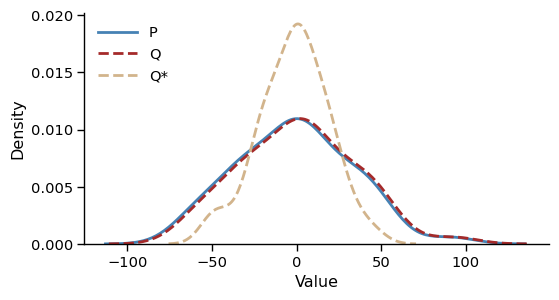

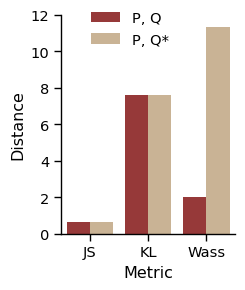

In [287]:
sns.set_context("paper", font_scale=1.2)

seed = 88 # np.random.randint(100)
print('using seed = ', seed) # 68 # 88
np.random.seed(seed)  # For reproducibility
num_samples = 100
sampP = np.round(np.random.normal(loc=0, scale=40, size=num_samples))
sampQ = sampP + 2
sampQ2 = np.round(np.random.normal(loc=0, scale=20, size=num_samples))

# Define consistent bin edges
bins = np.arange(np.min([sampP, sampQ, sampQ2]) - 1, np.max([sampP, sampQ, sampQ2]) + 2)

# Compute distributions
P, _ = np.histogram(sampP, bins=bins, density=True)
Q, _ = np.histogram(sampQ, bins=bins, density=True)
Q2, _ = np.histogram(sampQ2, bins=bins, density=True)

epsilon = 1e-10  # Small constant to avoid division by zero
P += epsilon
Q += epsilon
Q2 += epsilon

# calculate distance
wass_1 = scipy.stats.wasserstein_distance(sampP, sampQ)
wass_2 = scipy.stats.wasserstein_distance(sampP, sampQ2)
kl_qp = scipy.stats.entropy(Q, P)
kl_q2p = scipy.stats.entropy(Q2, P)
kl_pq = scipy.stats.entropy(P, Q)
kl_pq2 = scipy.stats.entropy(P, Q2)
js_distance_1 = scipy.spatial.distance.jensenshannon(P, Q, base=2)
js_distance_2 = scipy.spatial.distance.jensenshannon(P, Q2, base=2)
max_value = max(wass_1, wass_2, kl_pq, kl_pq2, js_distance_1, js_distance_2)


# plotting
p_color = "steelblue"
q_color = "brown"
qs_color = 'tan'
lw = 2

# Plot distributions
plt.figure(figsize=(6, 3))
# Plot P and Q2
sns.kdeplot(sampP, label='P', color=p_color, fill=False, linewidth=lw)
sns.kdeplot(sampQ, label='Q', color=q_color, fill=False, linewidth=lw, linestyle='--')
sns.kdeplot(sampQ2, label='Q*', color=qs_color, fill=False, linewidth=lw, linestyle='--')
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(
    frameon=False,
    handlelength=2.7,  # Increase line length in legend
    handletextpad=0.8,  # Adjust spacing between line and text
    loc='upper left',
)
sns.despine()
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_combined.pdf", transparent=True)

# plt.figure(figsize=(4, 2))
metrics = ['JS', 'KL', 'Wass']
values_pq = [js_distance_1, kl_pq, wass_1]
values_pq2 = [js_distance_2, kl_pq2, wass_2]
data = pd.DataFrame({
    'Metric': metrics * 2,
    'Value': values_pq + values_pq2,
    'Comparison': ['P, Q'] * 3 + ['P, Q*'] * 3
})

# Colors for the hue levels
q_color = "brown"
qs_color = "tan"
custom_palette = {
    'P, Q': q_color,
    'P, Q*': qs_color
}

# Plot catplot
sns.set_context("paper", font_scale=1.2)
g = sns.catplot(
    data=data, kind="bar",
    y="Value", x="Metric", hue="Comparison",
    palette=custom_palette,
    height=3, aspect=1)
# g._legend.set_title("distance between")
g._legend.set_title(None)
g.fig.set_size_inches(3.5, 3)  # Width=10, Height=6
g._legend.set_bbox_to_anchor((0.52, 0.87))  # Adjust position as needed (x, y)
g.set_yticklabels(rotation=0)
g.set_axis_labels("Metric", "Distance")
# plt.show()
plt.savefig("/home/yl241/data/rainfall_plots_LiT/rebuttal/wass_kl_metric_combined.pdf", transparent=True)
print(f"Wassstein     : left  = {wass_1:.3f} | right = {wass_2:.3f}")
print(f"KL(P||Q)      : left  = {kl_pq:.3f} | right = {kl_pq2:.3f}")
print(f"KL(Q||P)      : left  = {kl_qp:.3f} | right = {kl_q2p:.3f}")
print(f"J-S distance  : left  = {js_distance_1:.3f} | right = {js_distance_2:.3f}")
